# TUGAS UTS BIG DATA MANAGEMENT
<ul>
    <li>NAMA : Muhammad Rizki</li>
    <li>NIM  : 6220211002</li>
    <li>GITHUB : <a href="https://github.com/rizgeek/BTC">rizgeek/BTC</a></li>
    <li>SUMBER DATA :<a href="https://www.investing.com/crypto/bitcoin/btc-usd-historical-data">investing.com</a> </li>
</ul>


In [3]:
# import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
import plotly.graph_objs as go

In [4]:
# read data
coint = pd.read_csv('26-april.csv')
coint

,Date,Price,Open,High,Low,Vol.,Change %
0,"Apr 26, 2023","29,723.2","28,298.8","29,995.7","28,258.5",119.37K,5.03%
1,"Apr 25, 2023","28,298.8","27,510.1","28,375.6","27,201.1",65.31K,2.87%
2,"Apr 24, 2023","27,509.3","27,591.4","27,978.8","27,054.3",66.74K,-0.30%
3,"Apr 23, 2023","27,591.4","27,813.8","27,815.0","27,388.5",41.77K,-0.80%
4,"Apr 22, 2023","27,813.9","27,264.8","27,872.0","27,165.7",44.30K,2.01%
...,...,...,...,...,...,...,...
4661,"Jul 22, 2010",0.1,0.1,0.1,0.1,2.16K,0.00%
4662,"Jul 21, 2010",0.1,0.1,0.1,0.1,0.58K,0.00%
4663,"Jul 20, 2010",0.1,0.1,0.1,0.1,0.26K,0.00%
4664,"Jul 19, 2010",0.1,0.1,0.1,0.1,0.57K,0.00%


In [5]:
# get dates and pries atribute
data = pd.DataFrame()
data['date'] = coint["Date"].astype(str)
data['price'] = coint["Price"]
data

,date,price
0,"Apr 26, 2023","29,723.2"
1,"Apr 25, 2023","28,298.8"
2,"Apr 24, 2023","27,509.3"
3,"Apr 23, 2023","27,591.4"
4,"Apr 22, 2023","27,813.9"
...,...,...
4661,"Jul 22, 2010",0.1
4662,"Jul 21, 2010",0.1
4663,"Jul 20, 2010",0.1
4664,"Jul 19, 2010",0.1


In [6]:
# change date string to date format and convert string price to float
data['date']  = pd.to_datetime(data['date'])
data['price'] = data['price'].str.replace(',', '')
data['price'] = data['price'].astype(float)

# change date string to date format and convert string price to float
# data['date'] = pd.to_datetime(data['date'])
# data['price'] = data['price'].replace(',', '').astype(float)

data

,date,price
0,2023-04-26,29723.2
1,2023-04-25,28298.8
2,2023-04-24,27509.3
3,2023-04-23,27591.4
4,2023-04-22,27813.9
...,...,...
4661,2010-07-22,0.1
4662,2010-07-21,0.1
4663,2010-07-20,0.1
4664,2010-07-19,0.1


<class 'pandas.core.frame.DataFrame'>
<bound method NDFrame.head of               price
date               
2010-07-18      0.1
2010-07-19      0.1
2010-07-20      0.1
2010-07-21      0.1
2010-07-22      0.1
...             ...
2023-04-22  27813.9
2023-04-23  27591.4
2023-04-24  27509.3
2023-04-25  28298.8
2023-04-26  29723.2

[4666 rows x 1 columns]>


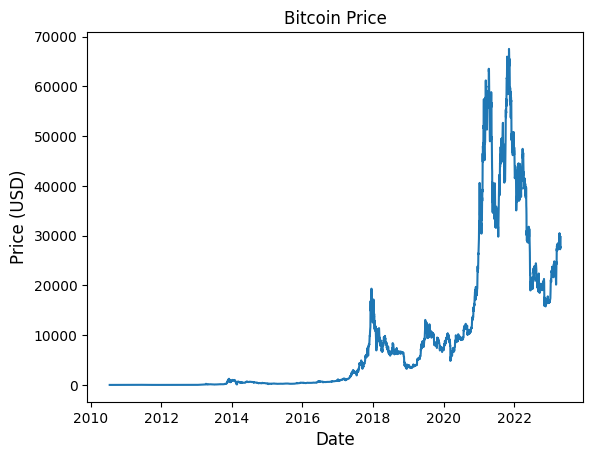

In [7]:
# plot data
price = data["price"]
Date1 = data["date"]
train1 = data[['date', 'price']]

# setting date as index
train2 = train1.set_index("date")
train2.sort_index(inplace=True)
print(type(train2))
print(train2.head)
plot.plot(train2)
plot.xlabel('Date', fontsize=12)
plot.ylabel('Price (USD)', fontsize=12)
plot.title('Bitcoin Price', fontsize=12)
plot.show()

In [8]:
def test_stationarity(x):
    # determine rolling 
    rol_mean = x.rolling(window=22, center=False).mean()
    rol_std = x.rolling(window=12, center=False).std()

    #Perform Dickey Fuller test    
    result = adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
         if result[0]>value:
            print("The graph is non stationery")
            break
         else:
            print("The graph is stationery")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f ' % (key, value))
   
    # plot rolling
    plot.plot(x, color='blue', label='Original')
    plot.plot(rol_mean, color='red', label='Rolling Mean')
    plot.plot(rol_std, color='green', label='Rolling STD')

    plot.legend(loc='best')
    plot.title('Rolling Mean & Standard Deviation')
    plot.show(block=False)
    

ADF Stastistic: -1.505951
p-value: 0.530566
The graph is non stationery
Critical values:
	1%: -3.432 
	5%: -2.862 
	10%: -2.567 


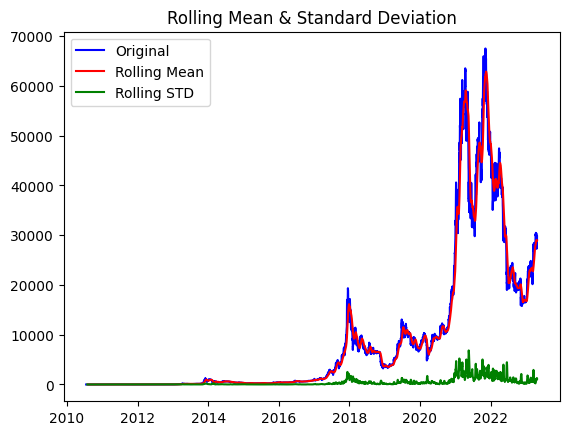

In [9]:
ts = train2['price']      
test_stationarity(ts)

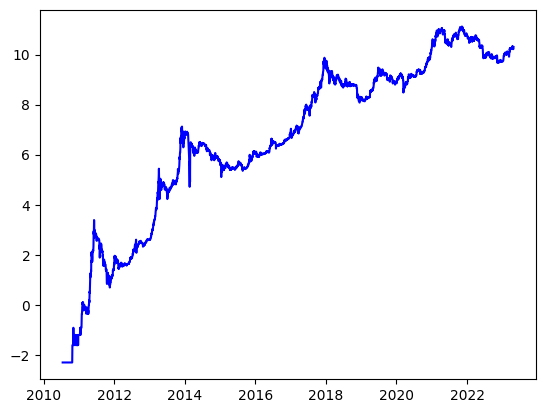

ADF Stastistic: -2.939661
p-value: 0.040927
The graph is non stationery
Critical values:
	1%: -3.432 
	5%: -2.862 
	10%: -2.567 


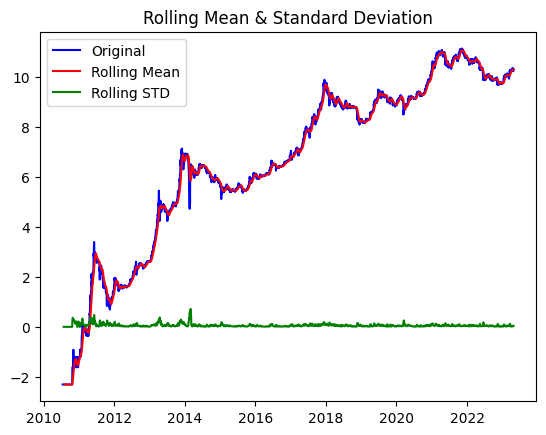

In [10]:
ts_log = np.log(ts)
plot.plot(ts_log,color="blue")
plot.show()

test_stationarity(ts_log)

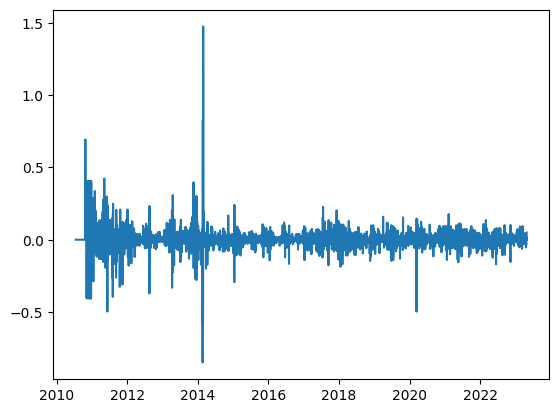

In [11]:
ts_log_diff = ts_log - ts_log.shift()
plot.plot(ts_log_diff)
plot.show()

ADF Stastistic: -25.907494
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.432 
	5%: -2.862 
	10%: -2.567 


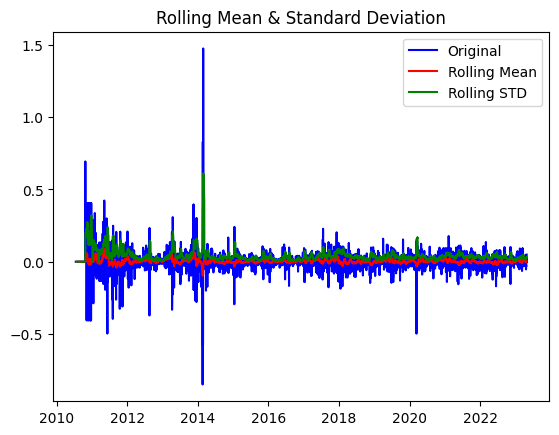

In [12]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


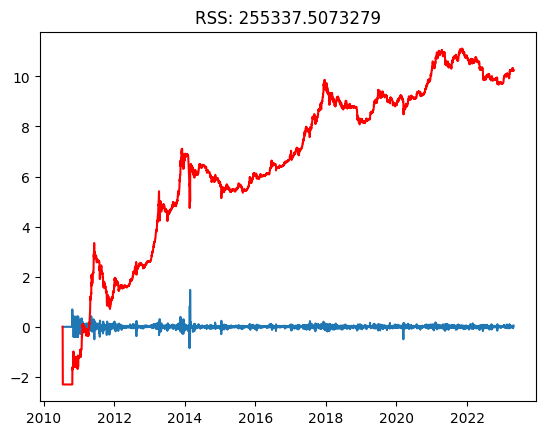

In [13]:
# Define the order of the ARIMA model
p, d, q = 2, 1, 0

# Create the ARIMA model
model = ARIMA(ts_log, order=(p, d, q))

# Fit the ARIMA model
results_ARIMA = model.fit()

# Generate the fitted values and plot the results
fitted_values = results_ARIMA.fittedvalues
fitted_ts = fitted_values - ts_log_diff
fitted_ts = fitted_ts.dropna()

plot.plot(ts_log_diff)
plot.plot(fitted_values, color='red')
plot.title('RSS: %.7f'% sum(fitted_ts**2))
plot.show()


In [14]:
size = int(len(ts_log)-300)
# Divide into train and test
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')
# We go over each value in the test set and then apply ARIMA model and calculate the predicted value. We have the expected value in the test set therefore we calculate the error between predicted and expected value 
for t in range(len(test_arima)):
    model = ARIMA(history, order=(2, 1, 0))
    model_fit = model.fit()
    
    output = model_fit.forecast()
    
    pred_value = output[0]
    
        
    original_value = test_arima[t]
    history.append(original_value)
    
    pred_value = np.exp(pred_value)
    
    
    original_value = np.exp(original_value)
    
    # Calculating the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))
    


Printing Predicted vs Expected Values...


predicted = 19954.495503,   expected = 19262.900000,   error = 3.590298  %
predicted = 19297.335110,   expected = 19243.200000,   error = 0.281321  %
predicted = 19347.223578,   expected = 19309.900000,   error = 0.193287  %
predicted = 19312.407605,   expected = 20215.800000,   error = 4.468744  %
predicted = 20195.946983,   expected = 20200.600000,   error = 0.023034  %
predicted = 20054.148005,   expected = 20561.100000,   error = 2.465588  %


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 20560.122305,   expected = 21637.800000,   error = 4.980533  %
predicted = 21566.763484,   expected = 21611.200000,   error = 0.205618  %
predicted = 21436.988559,   expected = 21587.500000,   error = 0.697216  %
predicted = 21591.939172,   expected = 20847.400000,   error = 3.571377  %
predicted = 20857.859478,   expected = 19963.200000,   error = 4.481543  %
predicted = 20082.175202,   expected = 19330.900000,   error = 3.886395  %
predicted = 19470.086793,   expected = 20250.000000,   error = 3.851423  %
predicted = 20344.991013,   expected = 20586.000000,   error = 1.170742  %
predicted = 20431.584465,   expected = 20825.100000,   error = 1.889621  %


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 20768.545500,   expected = 21209.900000,   error = 2.080889  %
predicted = 21167.480295,   expected = 20785.600000,   error = 1.837235  %
predicted = 20729.137805,   expected = 22525.800000,   error = 7.976019  %
predicted = 22581.203103,   expected = 23410.200000,   error = 3.541178  %
predicted = 23105.198230,   expected = 23215.200000,   error = 0.473835  %
predicted = 23075.521288,   expected = 23153.000000,   error = 0.334638  %
predicted = 23184.322968,   expected = 22675.200000,   error = 2.245285  %
predicted = 22689.188106,   expected = 22460.400000,   error = 1.018629  %
predicted = 22536.802988,   expected = 22582.100000,   error = 0.200588  %


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 22615.114127,   expected = 21301.900000,   error = 6.164775  %
predicted = 21295.033548,   expected = 21248.700000,   error = 0.218054  %
predicted = 21446.846828,   expected = 22958.300000,   error = 6.583472  %
predicted = 22951.130529,   expected = 23850.000000,   error = 3.768845  %
predicted = 23550.498164,   expected = 23774.300000,   error = 0.941360  %


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 23631.523270,   expected = 23634.200000,   error = 0.011326  %
predicted = 23647.392778,   expected = 23303.400000,   error = 1.476148  %
predicted = 23328.239503,   expected = 23271.200000,   error = 0.245108  %
predicted = 23323.646425,   expected = 22988.600000,   error = 1.457446  %
predicted = 22996.171832,   expected = 22820.800000,   error = 0.768474  %
predicted = 22866.628384,   expected = 22612.100000,   error = 1.125629  %
predicted = 22640.288736,   expected = 23308.200000,   error = 2.865563  %
predicted = 23335.875826,   expected = 22944.200000,   error = 1.707080  %
predicted = 22837.225066,   expected = 23175.300000,   error = 1.458773  %
predicted = 23231.193406,   expected = 23816.300000,   error = 2.456749  %
predicted = 23772.579353,   expected = 23146.700000,   error = 2.703968  %


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 23052.567818,   expected = 23962.900000,   error = 3.798923  %
predicted = 24064.043015,   expected = 23935.300000,   error = 0.537879  %
predicted = 23804.227405,   expected = 24398.700000,   error = 2.436493  %
predicted = 24398.894554,   expected = 24442.500000,   error = 0.178400  %
predicted = 24367.826936,   expected = 24302.800000,   error = 0.267570  %
predicted = 24297.153080,   expected = 24101.700000,   error = 0.810951  %
predicted = 24125.463880,   expected = 23856.800000,   error = 1.126152  %
predicted = 23890.505766,   expected = 23338.000000,   error = 2.367408  %
predicted = 23380.535058,   expected = 23203.600000,   error = 0.762533  %
predicted = 23285.924986,   expected = 20831.300000,   error = 11.783350  %
predicted = 20870.758248,   expected = 21138.900000,   error = 1.268475  %
predicted = 21500.640457,   expected = 21517.200000,   error = 0.076960  %
predicted = 21463.767636,   expected = 21416.300000,   error = 0.221643  %
predicted = 21357.063100

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 19237.636790,   expected = 21365.200000,   error = 9.958078  %
predicted = 21338.929755,   expected = 21650.400000,   error = 1.438635  %
predicted = 21305.333655,   expected = 21834.900000,   error = 2.425321  %
predicted = 21787.468940,   expected = 22395.300000,   error = 2.714101  %
predicted = 22360.075219,   expected = 20175.500000,   error = 10.827862  %
predicted = 20114.368037,   expected = 20222.500000,   error = 0.534711  %
predicted = 20558.618893,   expected = 19701.700000,   error = 4.349467  %
predicted = 19699.270331,   expected = 19802.400000,   error = 0.520794  %
predicted = 19883.195332,   expected = 20113.500000,   error = 1.145025  %
predicted = 20094.382707,   expected = 19418.800000,   error = 3.479014  %


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 19377.450052,   expected = 19538.900000,   error = 0.826300  %
predicted = 19646.512073,   expected = 18872.400000,   error = 4.101821  %


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 18860.205883,   expected = 18489.000000,   error = 2.007712  %
predicted = 18594.141331,   expected = 19404.000000,   error = 4.173669  %
predicted = 19458.132790,   expected = 19293.500000,   error = 0.853307  %
predicted = 19147.930019,   expected = 18925.200000,   error = 1.176897  %
predicted = 18945.727066,   expected = 18803.200000,   error = 0.757994  %
predicted = 18861.677157,   expected = 19225.700000,   error = 1.893418  %
predicted = 19241.311826,   expected = 19081.000000,   error = 0.840165  %
predicted = 19015.502846,   expected = 19411.000000,   error = 2.037490  %
predicted = 19431.020876,   expected = 19593.000000,   error = 0.826719  %
predicted = 19538.288228,   expected = 19423.000000,   error = 0.593566  %


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 19395.990836,   expected = 19311.900000,   error = 0.435435  %


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 19339.547811,   expected = 19052.200000,   error = 1.508213  %
predicted = 19071.909211,   expected = 19628.300000,   error = 2.834636  %
predicted = 19664.767933,   expected = 20340.200000,   error = 3.320676  %
predicted = 20237.914851,   expected = 20157.500000,   error = 0.398933  %
predicted = 20046.073966,   expected = 19956.700000,   error = 0.447839  %
predicted = 19987.053333,   expected = 19531.300000,   error = 2.333451  %
predicted = 19566.181277,   expected = 19415.000000,   error = 0.778683  %
predicted = 19482.288999,   expected = 19441.000000,   error = 0.212381  %
predicted = 19459.104953,   expected = 19134.600000,   error = 1.695907  %
predicted = 19133.413260,   expected = 19059.100000,   error = 0.389910  %
predicted = 19107.696317,   expected = 19154.800000,   error = 0.245911  %
predicted = 19165.863752,   expected = 19379.800000,   error = 1.103914  %
predicted = 19362.348034,   expected = 19181.800000,   error = 0.941247  %
predicted = 19148.296137,

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 19560.926945,   expected = 19331.500000,   error = 1.186804  %
predicted = 19276.101236,   expected = 20082.700000,   error = 4.016386  %
predicted = 20114.592372,   expected = 20769.500000,   error = 3.153218  %


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 20638.299900,   expected = 20292.900000,   error = 1.702073  %
predicted = 20189.773230,   expected = 20594.400000,   error = 1.964742  %
predicted = 20667.187184,   expected = 20809.800000,   error = 0.685316  %
predicted = 20759.339951,   expected = 20626.300000,   error = 0.645002  %


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 20594.142008,   expected = 20496.300000,   error = 0.477364  %
predicted = 20526.221471,   expected = 20483.500000,   error = 0.208565  %
predicted = 20504.090456,   expected = 20154.400000,   error = 1.735058  %
predicted = 20159.463470,   expected = 20206.400000,   error = 0.232285  %
predicted = 20257.676657,   expected = 21145.900000,   error = 4.200452  %
predicted = 21128.252005,   expected = 21301.600000,   error = 0.813779  %
predicted = 21147.723917,   expected = 20916.300000,   error = 1.106429  %


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 20895.648019,   expected = 20589.000000,   error = 1.489378  %


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 20651.536988,   expected = 18527.400000,   error = 11.464841  %
predicted = 18591.819115,   expected = 15886.900000,   error = 17.026098  %
predicted = 16174.448097,   expected = 17589.100000,   error = 8.042776  %
predicted = 18005.732815,   expected = 17049.900000,   error = 5.606090  %
predicted = 16783.099937,   expected = 16795.200000,   error = 0.072045  %
predicted = 16880.315916,   expected = 16324.500000,   error = 3.404796  %
predicted = 16367.663773,   expected = 16613.700000,   error = 1.480924  %
predicted = 16685.629911,   expected = 16895.100000,   error = 1.239827  %
predicted = 16845.696781,   expected = 16540.500000,   error = 1.845148  %
predicted = 16500.000722,   expected = 16691.200000,   error = 1.145509  %


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 16745.735772,   expected = 16638.300000,   error = 0.645714  %
predicted = 16615.000903,   expected = 16699.200000,   error = 0.504210  %
predicted = 16706.992522,   expected = 16286.700000,   error = 2.580587  %
predicted = 16281.145241,   expected = 15776.200000,   error = 3.200677  %
predicted = 15843.313803,   expected = 16212.900000,   error = 2.279581  %
predicted = 16290.409229,   expected = 16623.900000,   error = 2.006092  %


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 16548.513647,   expected = 16601.200000,   error = 0.317365  %
predicted = 16535.936489,   expected = 16512.300000,   error = 0.143145  %
predicted = 16516.693426,   expected = 16456.500000,   error = 0.365773  %
predicted = 16470.977114,   expected = 16425.600000,   error = 0.276258  %
predicted = 16434.668852,   expected = 16211.700000,   error = 1.375358  %
predicted = 16218.502370,   expected = 16440.400000,   error = 1.349709  %
predicted = 16472.288403,   expected = 17163.900000,   error = 4.029455  %
predicted = 17119.085618,   expected = 16972.000000,   error = 0.866637  %
predicted = 16858.760028,   expected = 17093.600000,   error = 1.373847  %
predicted = 17122.819664,   expected = 16884.500000,   error = 1.411470  %
predicted = 16867.430908,   expected = 17112.600000,   error = 1.432682  %
predicted = 17143.717389,   expected = 16966.500000,   error = 1.044514  %
predicted = 16931.966961,   expected = 17089.300000,   error = 0.920652  %
predicted = 17111.281857,

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 16924.506714,   expected = 17119.000000,   error = 1.136125  %
predicted = 17118.502769,   expected = 17180.100000,   error = 0.358538  %
predicted = 17151.623449,   expected = 17439.100000,   error = 1.648460  %
predicted = 17426.842291,   expected = 17942.300000,   error = 2.872863  %
predicted = 17895.202132,   expected = 18851.300000,   error = 5.071787  %
predicted = 18758.255527,   expected = 19927.000000,   error = 5.865130  %
predicted = 19762.294320,   expected = 20958.200000,   error = 5.706147  %


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 20766.404846,   expected = 20879.800000,   error = 0.543085  %
predicted = 20715.237940,   expected = 21184.200000,   error = 2.213735  %
predicted = 21193.953778,   expected = 21137.100000,   error = 0.268976  %
predicted = 21089.413244,   expected = 20670.600000,   error = 2.026130  %
predicted = 20681.980999,   expected = 21081.200000,   error = 1.893720  %
predicted = 21151.668529,   expected = 22677.200000,   error = 6.727160  %
predicted = 22592.345924,   expected = 22775.700000,   error = 0.805043  %
predicted = 22514.507198,   expected = 22707.800000,   error = 0.851218  %
predicted = 22692.906638,   expected = 22915.500000,   error = 0.971366  %
predicted = 22924.424473,   expected = 22632.500000,   error = 1.289846  %
predicted = 22602.565374,   expected = 23055.100000,   error = 1.962840  %


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 23096.458424,   expected = 23016.000000,   error = 0.349576  %
predicted = 22949.392300,   expected = 23074.600000,   error = 0.542621  %
predicted = 23080.245848,   expected = 23027.900000,   error = 0.227315  %
predicted = 23019.096307,   expected = 23753.100000,   error = 3.090139  %
predicted = 23754.118733,   expected = 22832.200000,   error = 4.037801  %
predicted = 22729.059882,   expected = 23125.100000,   error = 1.712599  %
predicted = 23266.831696,   expected = 23725.600000,   error = 1.933643  %
predicted = 23672.564460,   expected = 23427.600000,   error = 1.045623  %
predicted = 23335.866795,   expected = 23431.200000,   error = 0.406864  %
predicted = 23477.852605,   expected = 23323.800000,   error = 0.660495  %
predicted = 23324.201368,   expected = 22936.000000,   error = 1.692542  %
predicted = 22956.065871,   expected = 22761.800000,   error = 0.853473  %
predicted = 22823.541208,   expected = 23251.700000,   error = 1.841409  %
predicted = 23275.169202,

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 22428.709935,   expected = 22410.000000,   error = 0.083489  %
predicted = 22397.382656,   expected = 22197.800000,   error = 0.899110  %
predicted = 22202.579013,   expected = 21710.800000,   error = 2.265135  %
predicted = 21747.719927,   expected = 20361.800000,   error = 6.806471  %


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 20444.822754,   expected = 20156.700000,   error = 1.429414  %
predicted = 20362.948722,   expected = 20467.500000,   error = 0.510816  %


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 20497.299089,   expected = 21994.800000,   error = 6.808432  %
predicted = 21927.810267,   expected = 24114.400000,   error = 9.067568  %
predicted = 23824.254257,   expected = 24699.700000,   error = 3.544358  %
predicted = 24340.346086,   expected = 24282.700000,   error = 0.237396  %
predicted = 24194.827046,   expected = 25004.100000,   error = 3.236561  %
predicted = 25064.888640,   expected = 27391.800000,   error = 8.494920  %
predicted = 27245.483726,   expected = 26914.500000,   error = 1.229760  %
predicted = 26535.307944,   expected = 27958.700000,   error = 5.091052  %
predicted = 28026.983913,   expected = 27720.500000,   error = 1.105622  %
predicted = 27557.410385,   expected = 28114.000000,   error = 1.979760  %


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 28148.421534,   expected = 27261.700000,   error = 3.252627  %
predicted = 27208.560183,   expected = 28310.700000,   error = 3.893015  %
predicted = 28438.578427,   expected = 27462.200000,   error = 3.555354  %
predicted = 27307.250871,   expected = 27475.600000,   error = 0.612722  %
predicted = 27606.858248,   expected = 27973.500000,   error = 1.310675  %
predicted = 27967.047423,   expected = 27129.800000,   error = 3.086080  %


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 27060.657755,   expected = 27262.200000,   error = 0.739274  %
predicted = 27392.255689,   expected = 28350.400000,   error = 3.379650  %


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 28319.206433,   expected = 28029.500000,   error = 1.033577  %
predicted = 27860.708458,   expected = 28473.700000,   error = 2.152834  %
predicted = 28520.684573,   expected = 28456.100000,   error = 0.226962  %
predicted = 28386.187849,   expected = 28198.300000,   error = 0.666309  %
predicted = 28203.255571,   expected = 27802.100000,   error = 1.442897  %
predicted = 27845.208060,   expected = 28164.400000,   error = 1.133317  %
predicted = 28223.794157,   expected = 28173.500000,   error = 0.178516  %
predicted = 28116.284917,   expected = 28036.700000,   error = 0.283860  %
predicted = 28036.461529,   expected = 27910.400000,   error = 0.451665  %
predicted = 27932.801534,   expected = 27941.200000,   error = 0.030058  %
predicted = 27960.720819,   expected = 28326.600000,   error = 1.291645  %
predicted = 28318.342947,   expected = 29641.000000,   error = 4.462255  %
predicted = 29565.833044,   expected = 30209.600000,   error = 2.131001  %
predicted = 29990.649958,

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 29800.242561,   expected = 30387.400000,   error = 1.932240  %
predicted = 30434.340236,   expected = 30472.500000,   error = 0.125227  %
predicted = 30392.454467,   expected = 30299.600000,   error = 0.306454  %
predicted = 30287.798043,   expected = 30310.300000,   error = 0.074239  %
predicted = 30337.258949,   expected = 29434.900000,   error = 3.065609  %
predicted = 29440.677748,   expected = 30382.200000,   error = 3.098927  %
predicted = 30513.756726,   expected = 28813.700000,   error = 5.900168  %
predicted = 28684.330880,   expected = 28240.500000,   error = 1.571611  %
predicted = 28481.017804,   expected = 27264.800000,   error = 4.460762  %


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 27359.026694,   expected = 27813.900000,   error = 1.635417  %
predicted = 27962.629838,   expected = 27591.400000,   error = 1.345455  %
predicted = 27507.315352,   expected = 27509.300000,   error = 0.007214  %
predicted = 27544.628503,   expected = 28298.800000,   error = 2.665030  %
predicted = 28305.046959,   expected = 29723.200000,   error = 4.771199  %


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



 Mean Error in Predicting Test Case Articles : 1.966890  %


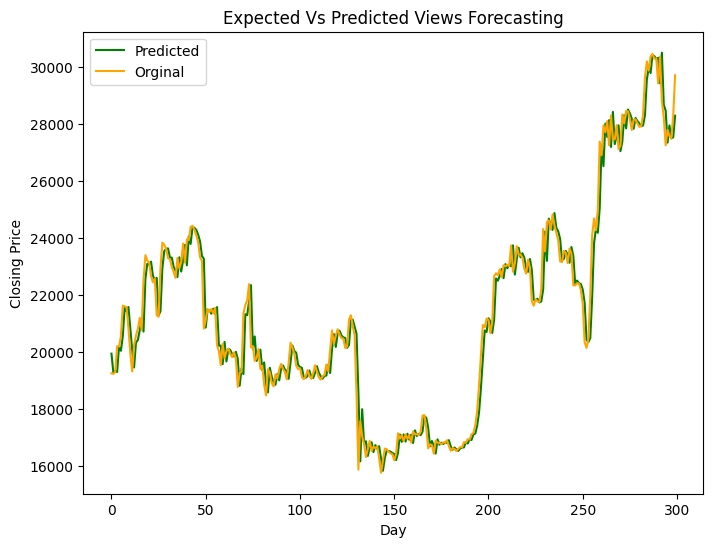

In [15]:
# After iterating over whole test set the overall mean error is calculated.   
print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')
plot.figure(figsize=(8, 6))
test_day = [t for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plot.plot(test_day, predictions, color= 'green')
plot.plot(test_day, originals, color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting')
plot.xlabel('Day')
plot.ylabel('Closing Price')
plot.legend(labels)
plot.show()

In [16]:
# save the model to a file
model_fit.save('arima_model.pkl')

In [17]:
# Load the saved model
loaded_model = ARIMAResults.load('arima_model.pkl')

# Define the number of periods for which you want to forecast
forecast_periods = 4

# Call the forecast method to make predictions for the next 'forecast_periods' periods
forecast = loaded_model.forecast(steps=forecast_periods)

# Convert the forecasted values back to the original scale
forecast_original_scale = np.exp(forecast)


# Create a date range for the forecast periods
last_date = pd.to_datetime(data['date']).max()
date_range = pd.date_range(last_date, periods=forecast_periods+1, freq='D')[1:]

# create Plotly line plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=date_range, y=forecast_original_scale, mode='lines', name='Forecast'))

fig.update_layout(title='Forecasted Values', xaxis_title='Date', yaxis_title='Original Scale')
fig.update_xaxes(tickformat='%Y-%m-%d')

fig.show()


In [18]:
predictions = pd.DataFrame()
predictions['date'] = date_range
predictions['price'] = forecast_original_scale

predictions

,date,price
0,2023-04-27,28305.046959
1,2023-04-28,28179.864384
2,2023-04-29,28179.975878
3,2023-04-30,28199.539634
